In [1]:
import pyPro4SAIL
import numpy as np
from numpy.random import seed
from numpy.random import rand
import numpy.matlib
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
krange=1000
N=1.28
chloro=rand(krange)*80
caroten=rand(krange)*8
brown=0
EWT=0.0005+rand(krange)*0.0695
LMA=0.003+rand(krange)*0.005
LAI=rand(krange)*8
hot_spot=0.2+rand(krange)*0.3
solar_zenith=numpy.matlib.repmat(np.arange(25,75,10),2,1).T.flatten()
solar_azimuth=numpy.matlib.repmat(np.arange(150,170,10),1,5).flatten()
view_zenith=0
view_azimuth=0
LIDF=2*rand(krange,2)-1
skyl=0.2
soilType=pyPro4SAIL.DEFAULT_SOIL
sal=len(solar_zenith)
rho=np.zeros((sal,krange,2101))

In [14]:
len(solar_zenith)

10

In [3]:
for i in np.arange(krange):
    while (abs(LIDF[i,0]) + abs(LIDF[i,1]) > 1):
        LIDF[i,:]=2*rand(1,2)-1

In [4]:
for j in np.arange(len(solar_zenith)):
    for k in np.arange(krange):
        wl,rho[j,k,:]=pyPro4SAIL.run(N, chloro[k], caroten[k], brown, EWT[k], LMA[k], LAI[k], hot_spot[k], solar_zenith[j], solar_azimuth[j], view_zenith, view_azimuth, list(LIDF[k,:]), skyl, soilType)

In [5]:


df = pd.DataFrame(rho.reshape(-1, 2101), columns=list(wl))
df['solar_zenith']=numpy.matlib.repmat(solar_zenith,krange,1).T.flatten()
df['solar_azimuth']=numpy.matlib.repmat(solar_azimuth,krange,1).T.flatten()
df['chloro']=numpy.matlib.repmat(chloro,1,sal).T
df['caroten']=numpy.matlib.repmat(caroten,1,sal).T
df['EWT']=numpy.matlib.repmat(EWT,1,sal).T
df['LMA']=numpy.matlib.repmat(LMA,1,sal).T
df['LAI']=numpy.matlib.repmat(LAI,1,sal).T
df['hot_spot']=numpy.matlib.repmat(hot_spot,1,sal).T
df['LIDF']=list(numpy.matlib.repmat(LIDF,sal,1))

In [6]:
df

,400,401,402,403,404,405,406,407,408,409,...,2500,solar_zenith,solar_azimuth,chloro,caroten,EWT,LMA,LAI,hot_spot,LIDF
0,0.020300,0.020121,0.020005,0.019954,0.019954,0.019972,0.020007,0.020052,0.020112,0.020169,...,0.007482,25,150,66.452249,1.737617,0.039547,0.003174,6.642598,0.227790,"[-0.09534706809462712, -0.7571220187353034]"
1,0.012314,0.012326,0.012328,0.012341,0.012361,0.012387,0.012418,0.012448,0.012485,0.012525,...,0.006176,25,150,19.454178,5.491925,0.055065,0.007267,4.584769,0.251266,"[-0.7461718556124615, 0.10718294232244663]"
2,0.018921,0.018891,0.018853,0.018835,0.018841,0.018861,0.018896,0.018936,0.018989,0.019042,...,0.008486,25,150,24.270864,4.487694,0.021724,0.004141,4.784543,0.286677,"[-0.40784502563148384, 0.5607995454433385]"
3,0.009684,0.009703,0.009716,0.009737,0.009764,0.009794,0.009828,0.009861,0.009900,0.009941,...,0.004711,25,150,14.739632,5.954368,0.035396,0.006905,6.462734,0.373875,"[-0.901132154211981, 0.05532803404428477]"
4,0.020452,0.020323,0.020230,0.020188,0.020190,0.020209,0.020245,0.020290,0.020350,0.020406,...,0.007543,25,150,59.093686,0.799933,0.055510,0.007964,6.747841,0.323118,"[-0.26037136516426007, 0.21651147337315635]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.012594,0.012416,0.012294,0.012229,0.012208,0.012205,0.012218,0.012240,0.012271,0.012301,...,0.004690,65,160,75.362952,2.279023,0.042141,0.003081,5.219741,0.486689,"[-0.4845628148266694, -0.311372039373492]"
9996,0.017670,0.017441,0.017267,0.017162,0.017116,0.017100,0.017110,0.017131,0.017167,0.017203,...,0.010108,65,160,56.142763,2.857567,0.019341,0.003122,4.248678,0.346508,"[-0.09325154890522569, -0.6704962275483288]"
9997,0.017850,0.017827,0.017770,0.017750,0.017713,0.017704,0.017699,0.017670,0.017646,0.017648,...,0.017186,65,160,79.671577,4.676390,0.024543,0.007795,0.830180,0.252158,"[-0.18856581375106862, 0.7385911733301316]"
9998,0.023119,0.022988,0.022872,0.022803,0.022785,0.022790,0.022820,0.022861,0.022920,0.022976,...,0.008340,65,160,39.906036,2.451482,0.052574,0.006577,5.876631,0.247857,"[0.6099488470350942, 0.3039981902703366]"


In [7]:
df.to_pickle("./Sims_10K_rows.pkl")  

In [8]:
df = pd.read_pickle('Sims_10K_rows.pkl')
df

,400,401,402,403,404,405,406,407,408,409,...,2500,solar_zenith,solar_azimuth,chloro,caroten,EWT,LMA,LAI,hot_spot,LIDF
0,0.020300,0.020121,0.020005,0.019954,0.019954,0.019972,0.020007,0.020052,0.020112,0.020169,...,0.007482,25,150,66.452249,1.737617,0.039547,0.003174,6.642598,0.227790,"[-0.09534706809462712, -0.7571220187353034]"
1,0.012314,0.012326,0.012328,0.012341,0.012361,0.012387,0.012418,0.012448,0.012485,0.012525,...,0.006176,25,150,19.454178,5.491925,0.055065,0.007267,4.584769,0.251266,"[-0.7461718556124615, 0.10718294232244663]"
2,0.018921,0.018891,0.018853,0.018835,0.018841,0.018861,0.018896,0.018936,0.018989,0.019042,...,0.008486,25,150,24.270864,4.487694,0.021724,0.004141,4.784543,0.286677,"[-0.40784502563148384, 0.5607995454433385]"
3,0.009684,0.009703,0.009716,0.009737,0.009764,0.009794,0.009828,0.009861,0.009900,0.009941,...,0.004711,25,150,14.739632,5.954368,0.035396,0.006905,6.462734,0.373875,"[-0.901132154211981, 0.05532803404428477]"
4,0.020452,0.020323,0.020230,0.020188,0.020190,0.020209,0.020245,0.020290,0.020350,0.020406,...,0.007543,25,150,59.093686,0.799933,0.055510,0.007964,6.747841,0.323118,"[-0.26037136516426007, 0.21651147337315635]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.012594,0.012416,0.012294,0.012229,0.012208,0.012205,0.012218,0.012240,0.012271,0.012301,...,0.004690,65,160,75.362952,2.279023,0.042141,0.003081,5.219741,0.486689,"[-0.4845628148266694, -0.311372039373492]"
9996,0.017670,0.017441,0.017267,0.017162,0.017116,0.017100,0.017110,0.017131,0.017167,0.017203,...,0.010108,65,160,56.142763,2.857567,0.019341,0.003122,4.248678,0.346508,"[-0.09325154890522569, -0.6704962275483288]"
9997,0.017850,0.017827,0.017770,0.017750,0.017713,0.017704,0.017699,0.017670,0.017646,0.017648,...,0.017186,65,160,79.671577,4.676390,0.024543,0.007795,0.830180,0.252158,"[-0.18856581375106862, 0.7385911733301316]"
9998,0.023119,0.022988,0.022872,0.022803,0.022785,0.022790,0.022820,0.022861,0.022920,0.022976,...,0.008340,65,160,39.906036,2.451482,0.052574,0.006577,5.876631,0.247857,"[0.6099488470350942, 0.3039981902703366]"


In [12]:
df.iloc[: , :5]

,400,401,402,403,404
0,0.020300,0.020121,0.020005,0.019954,0.019954
1,0.012314,0.012326,0.012328,0.012341,0.012361
2,0.018921,0.018891,0.018853,0.018835,0.018841
3,0.009684,0.009703,0.009716,0.009737,0.009764
4,0.020452,0.020323,0.020230,0.020188,0.020190
...,...,...,...,...,...
9995,0.012594,0.012416,0.012294,0.012229,0.012208
9996,0.017670,0.017441,0.017267,0.017162,0.017116
9997,0.017850,0.017827,0.017770,0.017750,0.017713
9998,0.023119,0.022988,0.022872,0.022803,0.022785


In [10]:
max(df[2400])

0.22210314761331032

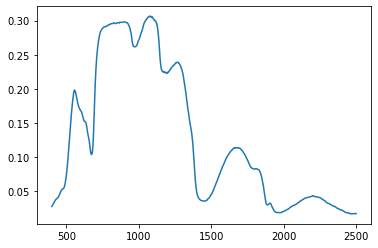

In [16]:
plt.plot(np.arange(400,2501,1),np.array(df.iloc[5])[:2101])
plt.savefig("Fullspec.png")

In [18]:
np.array(df.iloc[0])[2109]

array([0.58946127, 0.0507613 ])

In [4]:
import rasterio
import rasterio.plot
from osgeo import gdal

In [89]:
%pip install GDAL

Note: you may need to restart the kernel to use updated packages.


In [43]:
help(pyPro4SAIL)

Help on module pyPro4SAIL:

NAME
    pyPro4SAIL

DESCRIPTION
    Created on Apr 6 2015
    @author: Hector Nieto (hnieto@ias.csic.es)
    
    Modified on Apr 14 2016
    @author: Hector Nieto (hnieto@ias.csic.es)
    
    DESCRIPTION
    This package contains the main functions to run the coupled leaf-canopy model 
    PROSPECT5+4SAIL. It requires to import both radiative transfer models.
    
    * :doc:`FourSAIL` for simulating the canopy reflectance and transmittance factors.
    * :doc:`Prospect5` for simulating the lambertian reflectance and transmittance of a leaf.
    
    PACKAGE CONTENTS
    
    * :func:`run` run Pro4SAIL based on originial PyProSAIL interface at http://pyprosail.readthedocs.org/en/latest/.
    * :func:`run_TIR` runs the thermal component of 4SAIL to estimate the broadband at-sensor thermal radiance.
    * :func:`CalcStephanBoltzmann` Blackbody Broadband radiation emission. 
    
    EXAMPLE
    
    .. code-block:: python
    
        [N, chloro, caroten, b

In [36]:
src=rasterio.open("RendrR.tif",mode='r+')
srcg=gdal.Open("RendrR.tif")
ysm=np.shape(src.read(1))[0]
xsm=np.shape(src.read(1))[1]

In [6]:
ulx, xres, xskew, uly, yskew, yres  = srcg.GetGeoTransform()
lrx = ulx + (srcg.RasterXSize * xres)
lry = uly + (srcg.RasterYSize * yres)

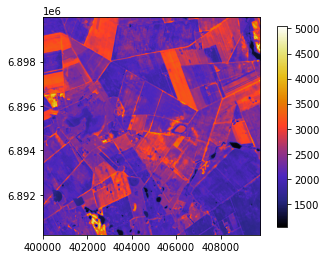

In [53]:
real_x=np.arange(int(ulx), int(lrx), int(xres))
real_y=np.arange(int(lry), int(uly), -int(yres))
dx = (real_x[1]-real_x[0])/2.
dy = (real_y[1]-real_y[0])/2.
extent = [real_x[0]-dx, real_x[-1]+dx, real_y[0]-dy, real_y[-1]+dy]
plt.imshow(src.read(5), cmap='CMRmap',extent=extent)
plt.colorbar(fraction=0.03)
plt.savefig("colbr.png")

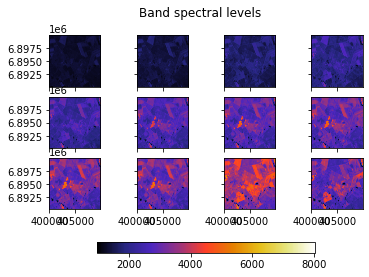

In [11]:
from matplotlib import colors

Nr = 3
Nc = 4
cmap = "CMRmap"

fig, axs = plt.subplots(Nr, Nc)
fig.suptitle('Band spectral levels')
inx=1
images = []
for i in range(Nr):
    for j in range(Nc):
        # Generate data with a range that varies from one plot to the next.
        images.append(axs[i, j].imshow(src.read(inx), cmap=cmap,extent=extent))
        axs[i, j].label_outer()
        inx=inx+1

# Find the min and max of all colors for use in setting the color scale.
vmin = min(image.get_array().min() for image in images)
vmax = max(image.get_array().max() for image in images)
norm = colors.Normalize(vmin=vmin, vmax=vmax)
for im in images:
    im.set_norm(norm)

fig.colorbar(images[0], ax=axs, orientation='horizontal', fraction=0.05)

plt.show()

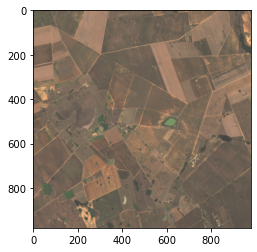

In [42]:
block2=np.zeros((ysm,xsm,12))
for j in range(1,13):
    block2[:,:,j-1]=np.minimum(src.read(j)/4096,1)
    
plt.imshow(block2[:,:,(3,2,1)])

In [ ]:
ma

In [39]:
cv2.imwrite('new_original.hdr', block2)

(980, 980, 12)

In [25]:
src.read(4)/4096

array([[0.40014648, 0.39892578, 0.40576172, ..., 0.54248047, 0.52246094,
        0.515625  ],
       [0.40454102, 0.41259766, 0.41113281, ..., 0.56298828, 0.53222656,
        0.51904297],
       [0.40209961, 0.40673828, 0.39892578, ..., 0.56542969, 0.53955078,
        0.5390625 ],
       ...,
       [0.44970703, 0.45556641, 0.44921875, ..., 0.37817383, 0.37646484,
        0.375     ],
       [0.46191406, 0.46191406, 0.46240234, ..., 0.37695312, 0.37597656,
        0.375     ],
       [0.46875   , 0.46289062, 0.46923828, ..., 0.3828125 , 0.38134766,
        0.37890625]])

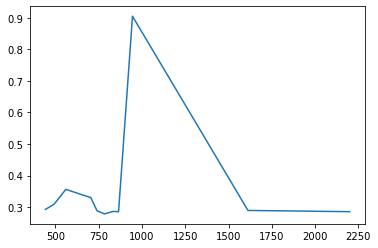

In [52]:
plt.plot(np.array((442,492,560,664.7,704,740,783,833,864.5,945,1612,2200)),block2[900,250,(0,1,2,3,4,5,6,7,8,9,10,11)])
plt.savefig('foo.png')